<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%A2%D1%80%D0%B5%D1%82%D1%8C%D1%8F_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [ ]:
## for data
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

auction = pd.read_csv('/content/drive/MyDrive/auction_verification.csv')

display(auction)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


In [ ]:
auction.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


# Обучение моделей и вывод метрик и  первых визуализаций

Для начала разделяем на тестовые и обучающие выборки


In [ ]:
X = auction.drop('verification.time', axis=1)  # Признаки
y = auction['verification.time']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% для обучения, 20% для теста

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Линейная регрессия

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R-squared: 0.3833591505604984
MSE: 64307134.71538741
MAE: 6160.9959240945755


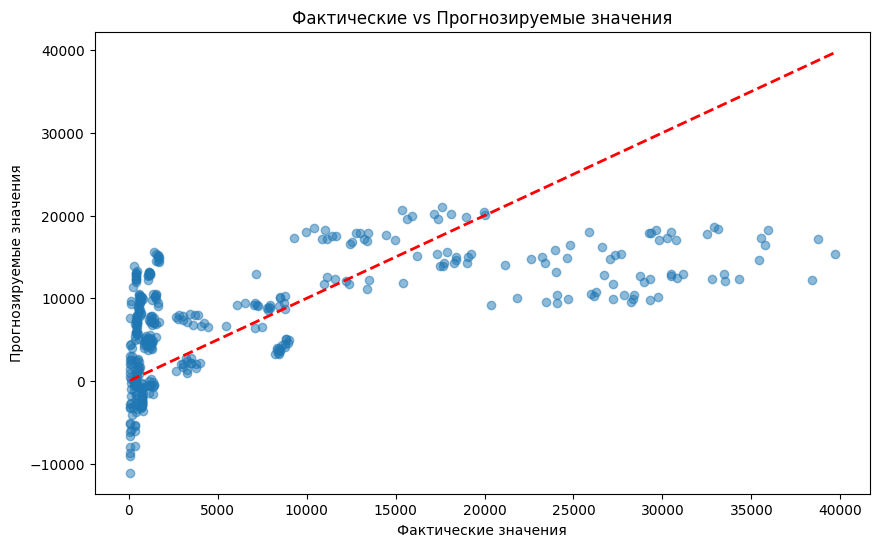

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Фактические vs прогнозируемые значения
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Линия идеального прогноза
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Фактические vs Прогнозируемые значения')
plt.show()

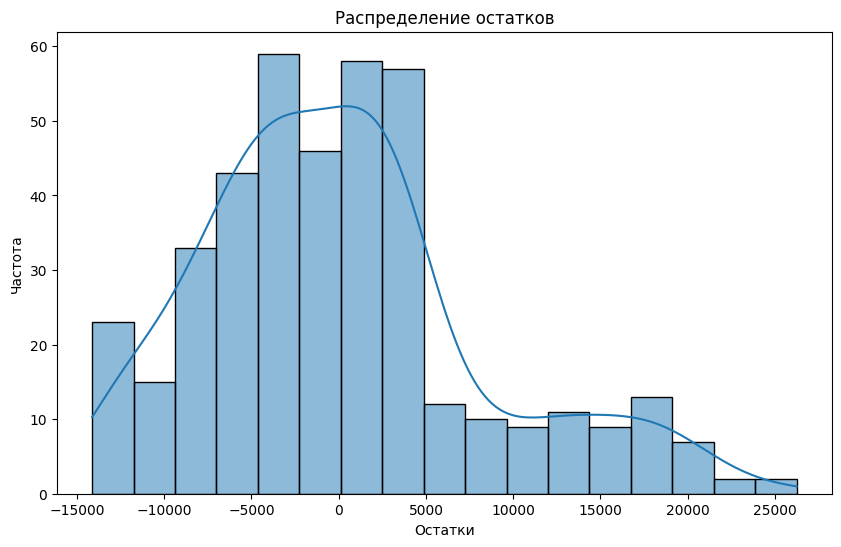

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)  # Гистограмма остатков
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков')
plt.show()

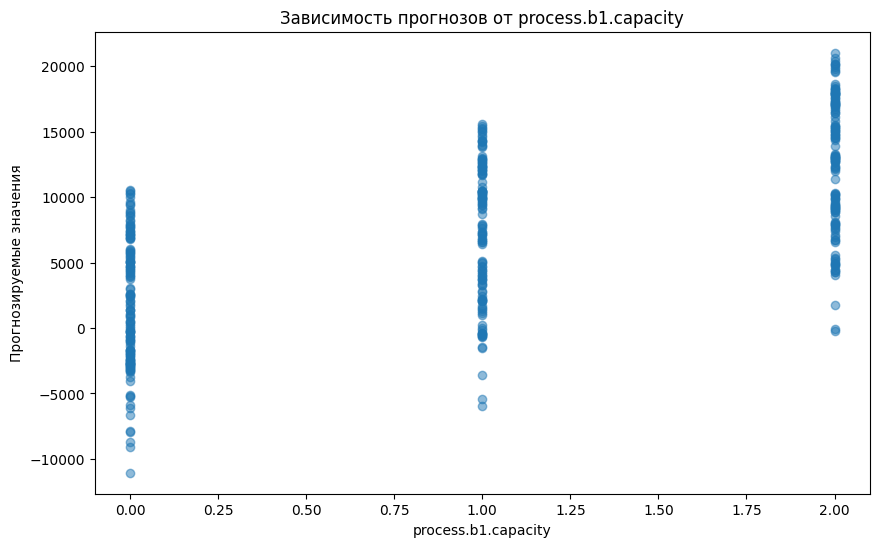

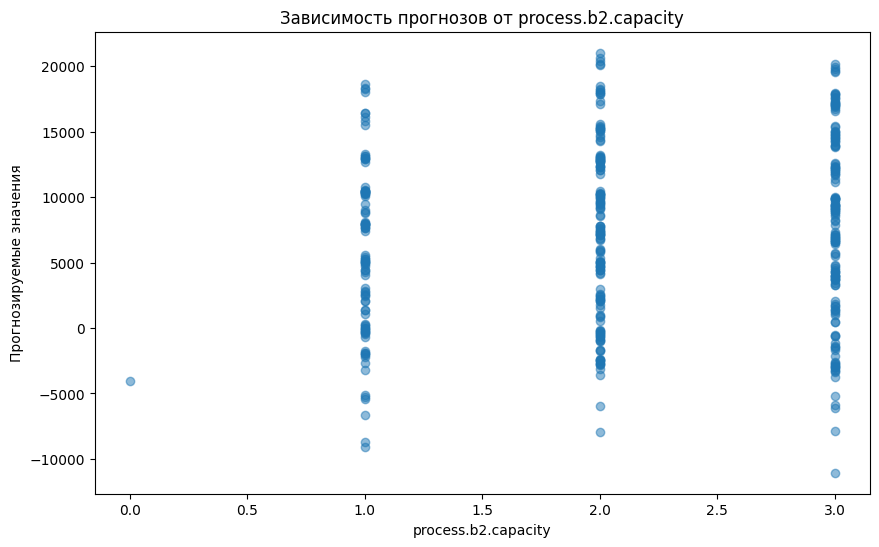

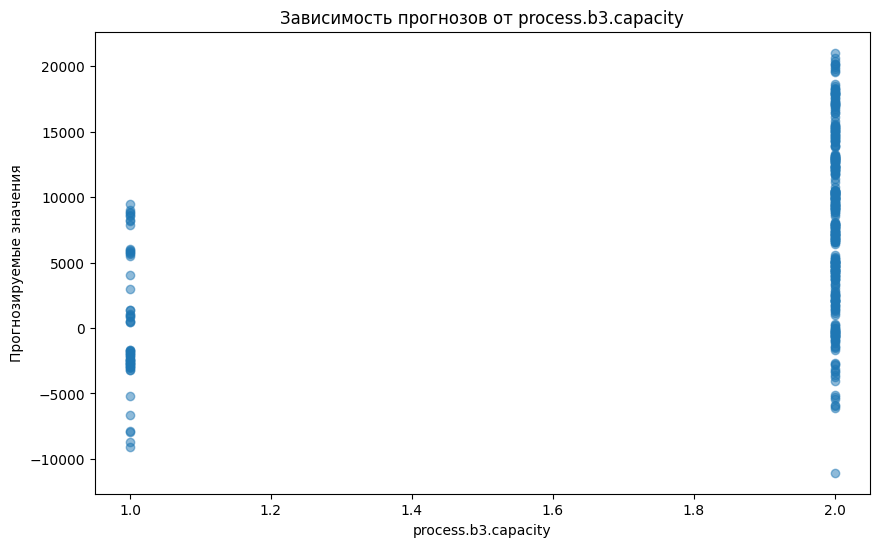

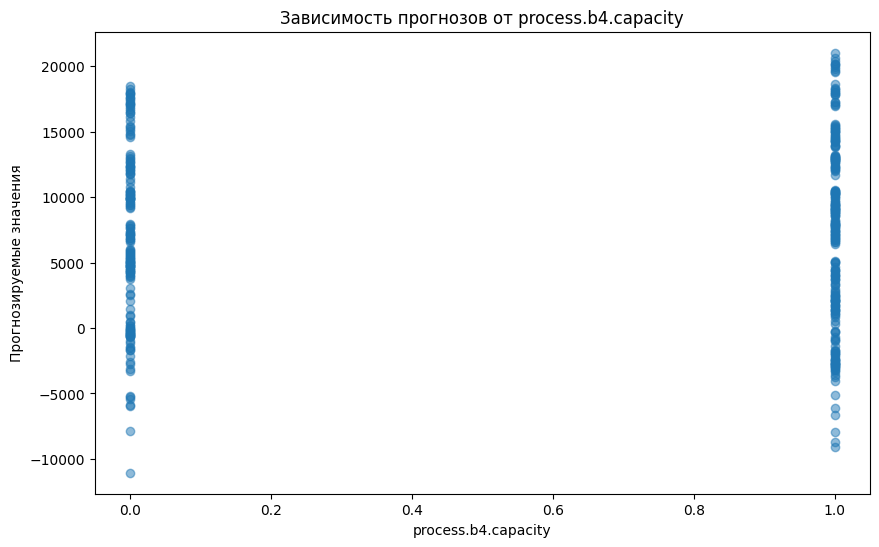

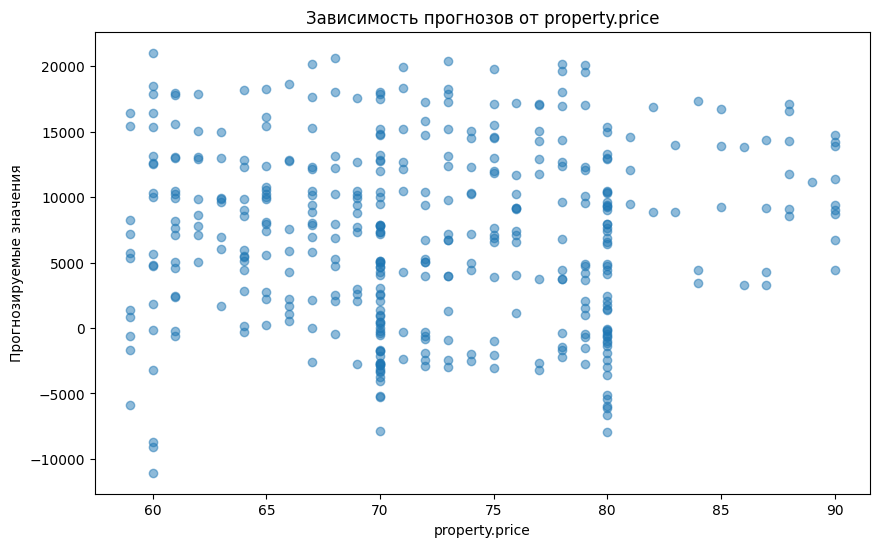

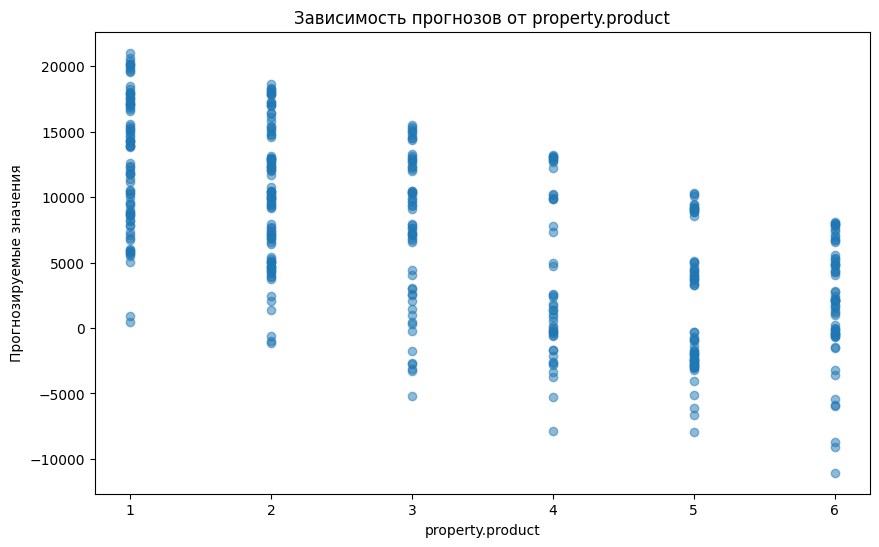

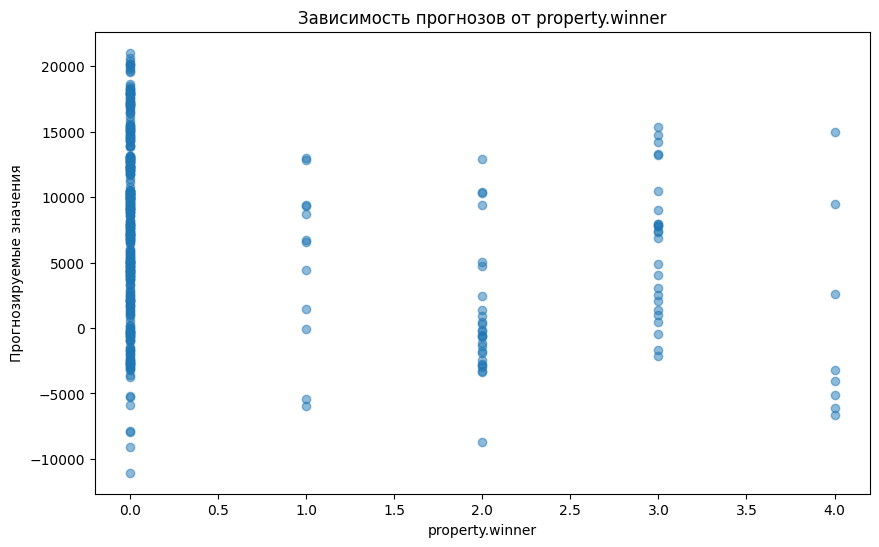

In [ ]:
for feature in X.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[feature], y_pred, alpha=0.5)  # Прогнозируемые значения vs признак
    plt.xlabel(feature)
    plt.ylabel('Прогнозируемые значения')
    plt.title(f'Зависимость прогнозов от {feature}')
    plt.show()

Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=4)  # Указываем степень полинома
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_pred_poly = poly_model.predict(poly.transform(X_test))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"R-squared: {r2_poly}")
print(f"MSE: {mse_poly}")
print(f"MAE: {mae_poly}")

R-squared: 0.9175863031963942
MSE: 8594611.770465473
MAE: 2128.4336459494507


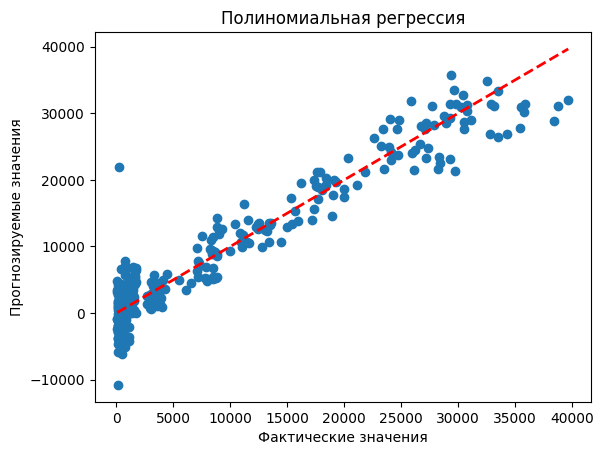

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_poly)
plt.xlabel("Фактические значения")
plt.ylabel("Прогнозируемые значения")
plt.title("Полиномиальная регрессия")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Линия идеального прогноза
plt.show()

Далее обучение моделей собранно в одину группу

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear')  # Можно выбрать другой kernel
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # Можно настроить параметр alpha
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Можно настроить параметры alpha и l1_ratio
elastic_model.fit(X_train, y_train)

y_pred_elastic = elastic_model.predict(X_test)

In [ ]:
from sklearn.linear_model import BayesianRidge

bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

y_pred_bayesian = bayesian_model.predict(X_test)

Вычисление метрик


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    "DecisionTreeRegressor": tree_model,
    "RandomForestRegressor": rf_model,
    "SVR": svr_model,
    "Lasso": lasso_model,
    "ElasticNet": elastic_model,
    "BayesianRidge": bayesian_model,
}


for model_name, model in models.items():
    if model_name == "PolynomialRegression":
        y_pred = model.predict(X_test_poly)
    else:
        y_pred = model.predict(X_test)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Метрики для {model_name}:")
    print(f"  R-squared: {r2}")
    print(f"  MSE: {mse}")
    print(f"  MAE: {mae}")
    print("-" * 20)

Метрики для DecisionTreeRegressor:
  R-squared: 0.9899837540707849
  MSE: 1044556.2873396354
  MAE: 436.88344207137584
--------------------
Метрики для RandomForestRegressor:
  R-squared: 0.9938786271643414
  MSE: 638374.7491649592
  MAE: 365.2690643688768
--------------------
Метрики для SVR:
  R-squared: -0.16526815479341583
  MSE: 121521394.95455687
  MAE: 6349.5256650840665
--------------------
Метрики для Lasso:
  R-squared: 0.3833831110514092
  MSE: 64304635.96669399
  MAE: 6160.360916510013
--------------------
Метрики для ElasticNet:
  R-squared: 0.33677474818362196
  MSE: 69165245.3027878
  MAE: 6065.709382958059
--------------------
Метрики для BayesianRidge:
  R-squared: 0.3839190696813186
  MSE: 64248742.87455326
  MAE: 6148.108541717496
--------------------


Визуализация решений

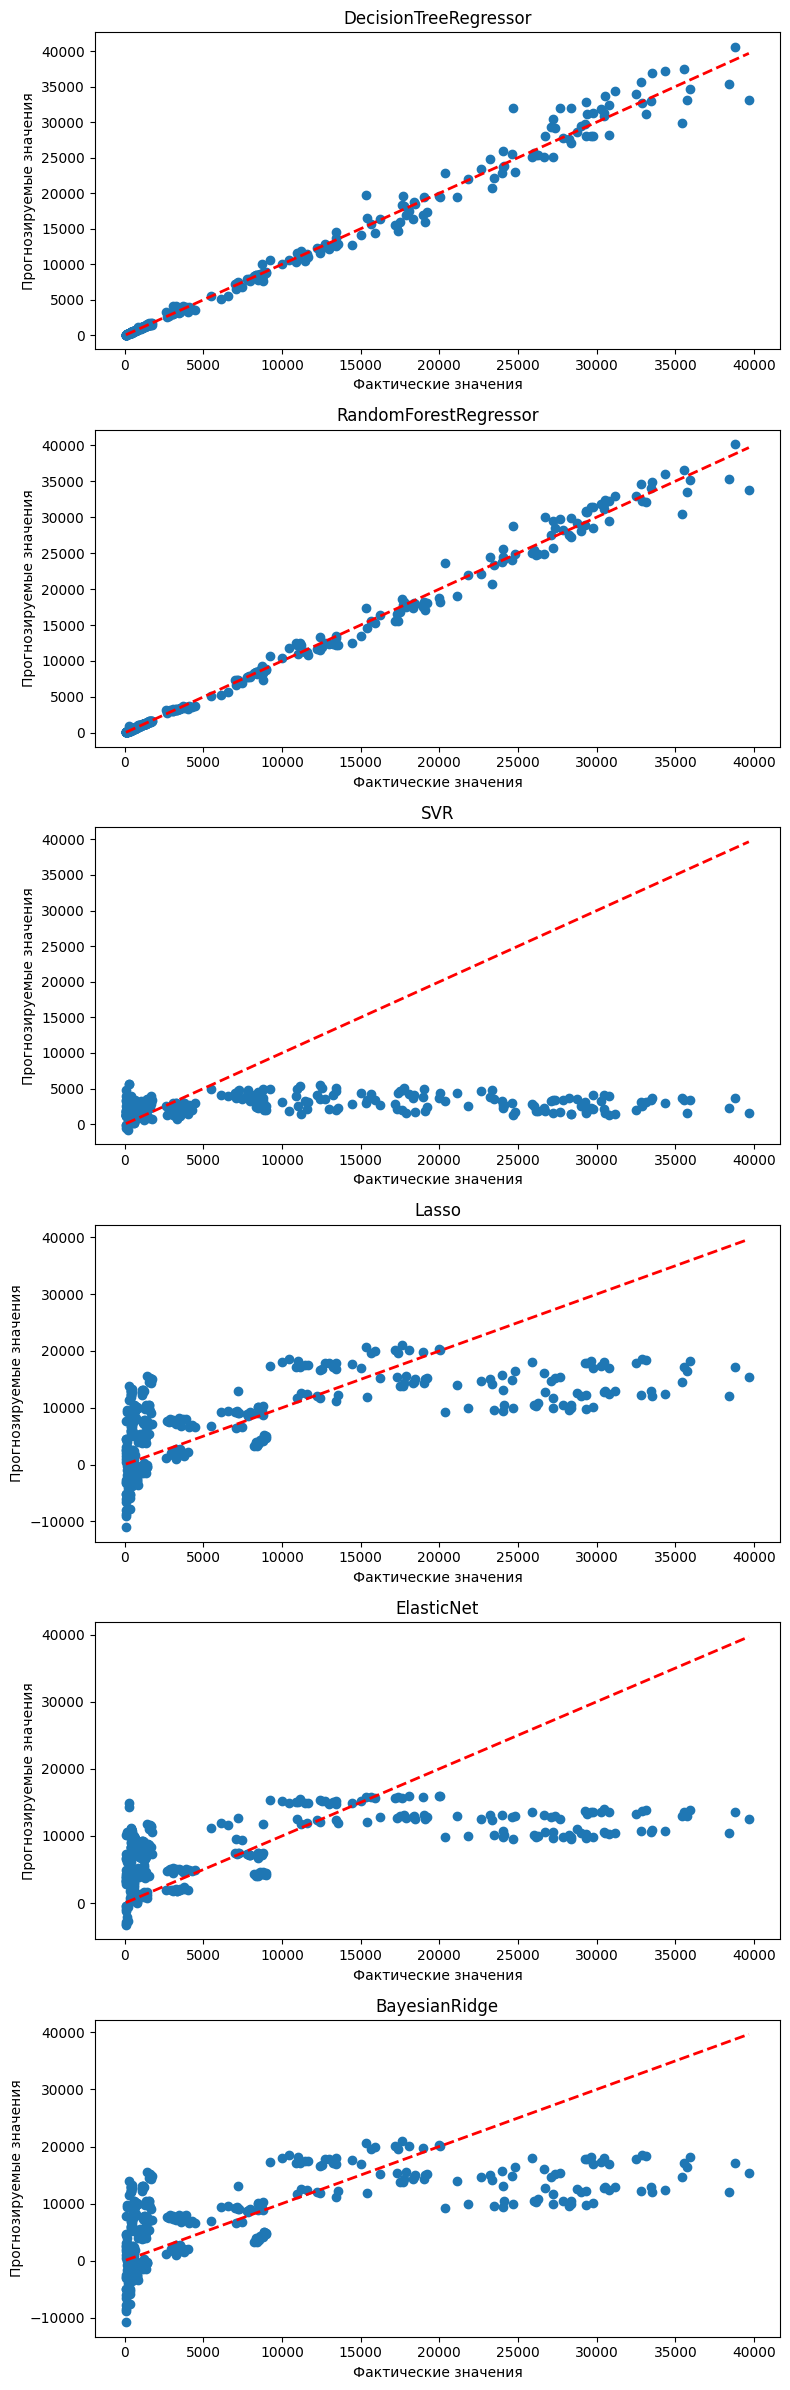

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(8, 4 * len(models)))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    ax = axes[i]
    ax.scatter(y_test, y_pred)
    ax.set_xlabel("Фактические значения")
    ax.set_ylabel("Прогнозируемые значения")
    ax.set_title(model_name)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Линия идеального прогноза

plt.tight_layout()
plt.show()

Визуализация по признаку для полиномиальной регрессии

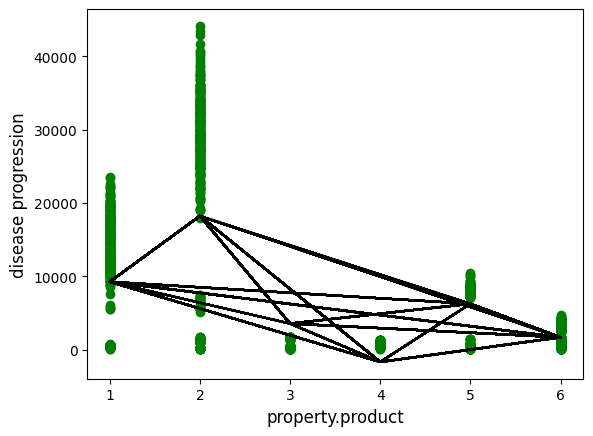

In [ ]:
X2 = auction['property.product'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = auction['verification.time'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('property.product', size=12)
plt.show()

Лучшими моделями для регрессии оказались деревья и полиномиальная регрессия выше 4 по